In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image   # 图像加载工具
import torchvision.transforms as transforms   # 图像预处理

In [2]:
# 一、加载数据
# 1. 加载图片
img_path = "Apple.jpg"
img = Image.open(img_path)

# 2. 定义并应用转换操作
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
img_tensor = transform(img)
print(img_tensor.shape)
print(img_tensor[0, 128])

# 加点噪声
img_tensor = img_tensor + 0.5 * torch.randn_like(img_tensor)

torch.Size([3, 256, 256])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9961, 0.9451, 0.5961,
        0.3922, 0.4078, 0.4784, 0.4980, 0.5098, 0.4784, 0.4235, 0.4706, 0.5412,
        0.5137, 0.4902, 0.4902, 0.4863, 0.4745, 0.4392, 0.4431, 0.4275, 0.4510,
        0.4863, 0.4784, 0.4706, 0.5216, 0.5412, 0.5373, 0.5176, 0.4824, 0.5020,
        0.5098, 0.5098, 0.5216, 0.5294, 0.5373, 0.5333, 0.4941, 0.5020, 0.5059,
        0.5020, 0.5176, 0.4588, 0.4706, 0.5137, 0.5333, 0.5412, 0.5451, 0.5608,
        0.6000, 0.6039, 0.6000, 0.5686, 0.5216, 0.5843, 0.6706, 0.6510, 0.6000,
        0.5373, 0.5490, 0.5569, 0.5804, 0.5961, 0.5765, 0.5529, 0.5490, 0.5451,
        0.5137, 0.4902, 0.4980, 0.4941, 0.4980, 0.5490, 0.5686, 0.5490, 0.5608,
        0.5451, 0.5098, 0.5294, 0.5412, 0.5216, 0.5255, 0.5333, 0.5216, 0.4902,
        0.4824

In [3]:
# 3. 将张量转换为numpy数组
img_ndarray = img_tensor.numpy().transpose((1, 2, 0))
print(img_ndarray.shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9839298..3.2373672].


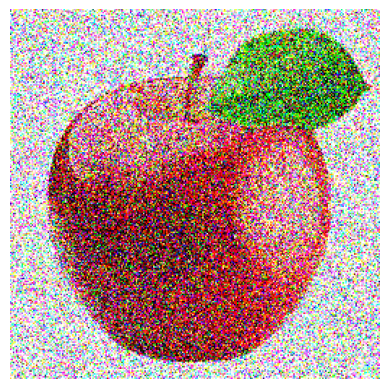

In [4]:
# 5. 用matplotlib显示图片
plt.imshow(img_ndarray)
plt.axis('off')
plt.show()

In [5]:
# 二、创建神经网络模型
import torch
import torch.nn as nn

In [7]:
# 自定义类：自编码器
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # 编码器
        self.encoder = nn.Sequential(
            # 第一层卷积-池化
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # 第二层卷积-池化
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # 解码器
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x)
        # print(x.shape)
        x = self.decoder(x)
        # print(x.shape)
        return x
    
model = AutoEncoder()
# 测试前向传播
y = model(torch.randn(1, 3, 256, 256))
print(y.shape)

torch.Size([1, 3, 256, 256])


In [8]:
# 三、训练模型
import torch.optim as optim

In [9]:
# 1. 定义损失函数和优化器
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# 2. 定义训练的轮次
epochs_num = 400

In [10]:
# 3. 迭代训练自编码器
for epoch in range(epochs_num):
    output = model(img_tensor)  # 前向传播
    loss_value = loss(output, img_tensor)   # 计算损失
    loss_value.backward()   # 反向传播
    optimizer.step()    # 更新参数
    optimizer.zero_grad()
    # 每10轮打印一次损失值
    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch + 1}/{epochs_num}, Loss: {loss_value.item():.4f}")

Epoch: 10/400, Loss: 0.4234
Epoch: 20/400, Loss: 0.4121
Epoch: 30/400, Loss: 0.3834
Epoch: 40/400, Loss: 0.3512
Epoch: 50/400, Loss: 0.3179
Epoch: 60/400, Loss: 0.2944
Epoch: 70/400, Loss: 0.2821
Epoch: 80/400, Loss: 0.2758
Epoch: 90/400, Loss: 0.2719
Epoch: 100/400, Loss: 0.2691
Epoch: 110/400, Loss: 0.2670
Epoch: 120/400, Loss: 0.2654
Epoch: 130/400, Loss: 0.2642
Epoch: 140/400, Loss: 0.2633
Epoch: 150/400, Loss: 0.2626
Epoch: 160/400, Loss: 0.2621
Epoch: 170/400, Loss: 0.2616
Epoch: 180/400, Loss: 0.2611
Epoch: 190/400, Loss: 0.2607
Epoch: 200/400, Loss: 0.2604
Epoch: 210/400, Loss: 0.2600
Epoch: 220/400, Loss: 0.2597
Epoch: 230/400, Loss: 0.2593
Epoch: 240/400, Loss: 0.2590
Epoch: 250/400, Loss: 0.2586
Epoch: 260/400, Loss: 0.2583
Epoch: 270/400, Loss: 0.2580
Epoch: 280/400, Loss: 0.2576
Epoch: 290/400, Loss: 0.2572
Epoch: 300/400, Loss: 0.2568
Epoch: 310/400, Loss: 0.2564
Epoch: 320/400, Loss: 0.2559
Epoch: 330/400, Loss: 0.2552
Epoch: 340/400, Loss: 0.2544
Epoch: 350/400, Loss: 0

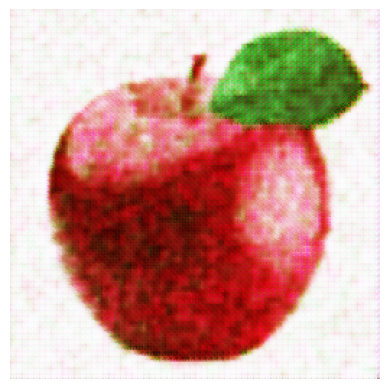

In [11]:
# 四、重构图像（推理）
with torch.no_grad():
    # 前向传播
    img_recon = model(img_tensor)

# 用matplotlib显示图片
img_ndarray = img_recon.numpy().transpose((1, 2, 0))
plt.imshow(img_ndarray)
plt.axis('off')
plt.show()